In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
info_csv = pd.read_csv('../data/complete_transformed_try.csv')

In [3]:
info_csv.head()

,dport,country,having_ip_address,hostname_length,count_dir,fd_length,url_length,abnormal_url,count-http,count-letters,...,count-,count=,count-https,sus_url,count?,count%,short_url,count@,count_embed_domain,malicious
0,42712,0,True,13,1,6,33,1,1,9,...,0,0,0,0,0,0,0,0,0,True
1,59458,1,True,15,1,1,30,1,1,5,...,0,0,0,0,0,0,0,0,0,True
2,41156,1,True,12,1,6,32,1,1,9,...,0,0,0,0,0,0,0,0,0,True
3,54452,0,True,14,1,1,29,1,1,5,...,0,0,0,0,0,0,0,0,0,True
4,47324,0,True,12,1,6,32,1,1,9,...,0,0,0,0,0,0,0,0,0,True


In [4]:
y = info_csv['malicious']
X = info_csv.drop('malicious', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

In [6]:
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

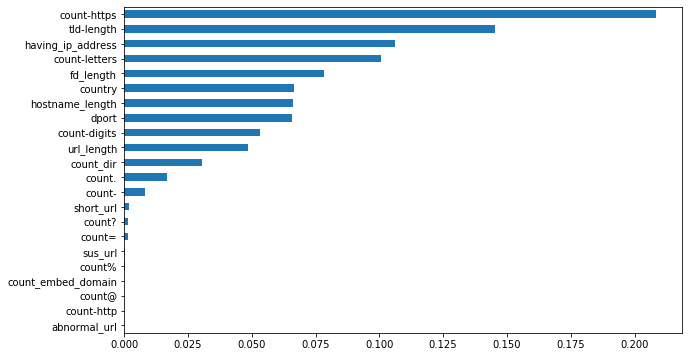

In [7]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [8]:
rfc_pred = rfc.predict(X_test)

In [9]:
print(confusion_matrix(y_test,rfc_pred))

[[4991    5]
 [  33 3989]]


In [10]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

       False       0.99      1.00      1.00      4996
        True       1.00      0.99      1.00      4022

    accuracy                           1.00      9018
   macro avg       1.00      1.00      1.00      9018
weighted avg       1.00      1.00      1.00      9018

